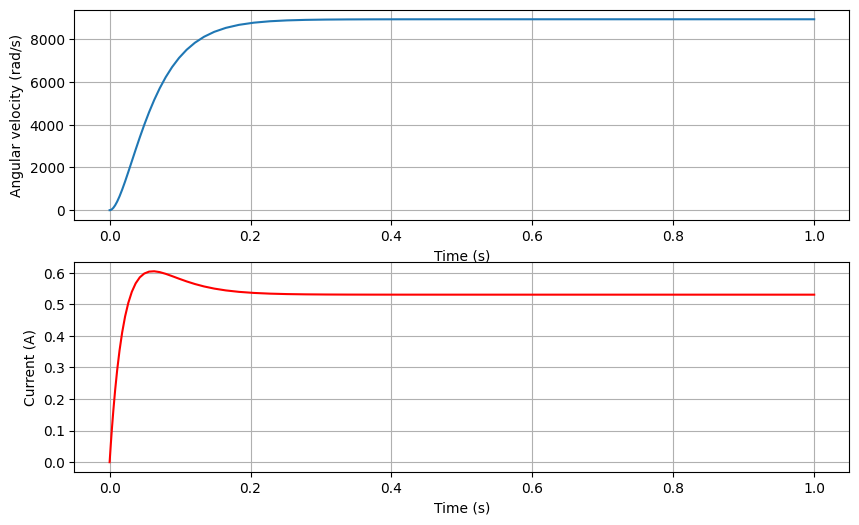

In [2]:
# In this code, we define the motor parameters and the ordinary differential equations representing 
# the motor dynamics. The motor_dynamics function describes the motor's behavior using the given parameters.
# We then solve the ODEs using solve_ivp and plot the angular velocity and current over time.

# This is a basic implementation, and it can be modified further to include more advanced features,
# such as fault modeling or thermal effects. Additionally, it can incorporate various control strategies to 
# control the motor's speed or torque.

                                                                                #
                                                                                
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
                                                                                #
# Motor parameters
R = 8.57  # Ohm, armature resistance
L = 0.1692  # H, armature inductance
ke = 1.624e-4  # V/rad/s, back-emf constant
kt = 0.67375  # N*m/A, torque constant
J = 2.7 * 1e-6  # kg*m^2, rotor inertia
damping = 0.00004  # N*m/(rad/s), rotor damping
V = 6  # V, DC supply voltage
                                                                                #
# Operating voltage: 6V
# Stall current: 2.5 A
# Rated current: 1.6 A
# Running current: 0.7 A
# Stall torque: 11 kg-cm
# no load speed: 6.1375 rad/s
# time constance (TAO): 0.019741 s
# overall circuite Resisitance: 0.8 Ohm average 




                                                                                #
# ODE function representing the motor dynamics
def motor_dynamics(t, y):
    omega = y[0]
    i = y[1]

    d_omega_dt = (kt * i - damping * omega) / J
    d_i_dt = (V - R * i - ke * omega) / L

    return [d_omega_dt, d_i_dt]
                                                                                #
# Initial conditions
initial_conditions = [0, 0]  # [omega_0, i_0]
                                                                                #
# Time span
t_span = [0, 1]
                                                                                #  
# Solve the ODE
sol = solve_ivp(motor_dynamics, t_span, initial_conditions, rtol=1e-6, atol=1e-8)
                                                                                #
# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
ax1.plot(sol.t, sol.y[0], label='Angular velocity (rad/s)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Angular velocity (rad/s)')
ax1.grid()
                                                                                #
ax2.plot(sol.t, sol.y[1], label='Current (A)', color='r')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Current (A)')
ax2.grid()

plt.show()
                                                                                #

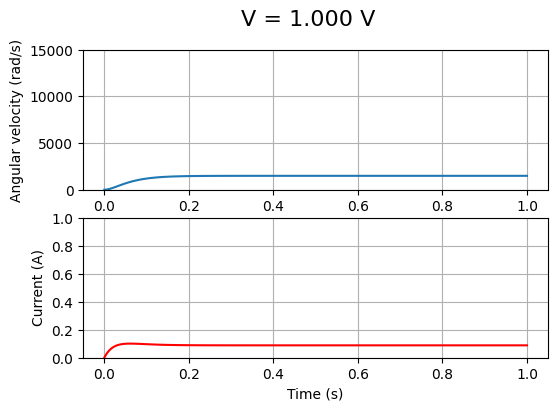

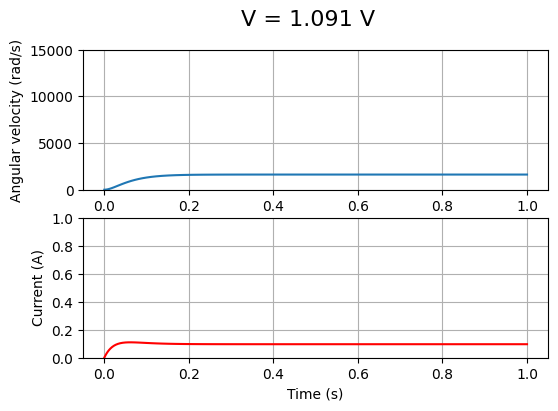

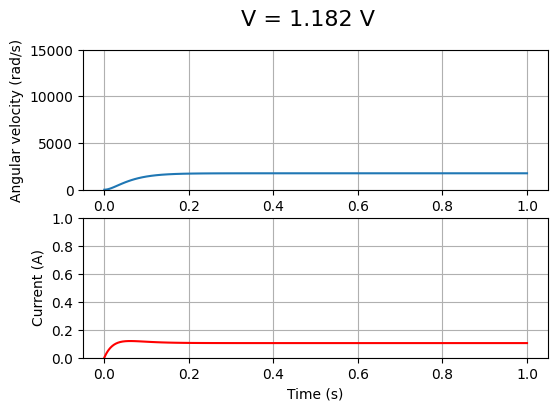

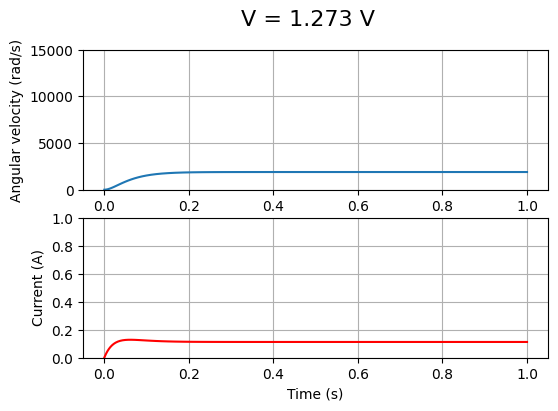

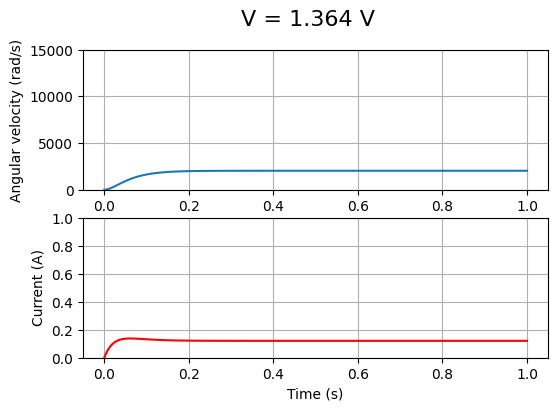

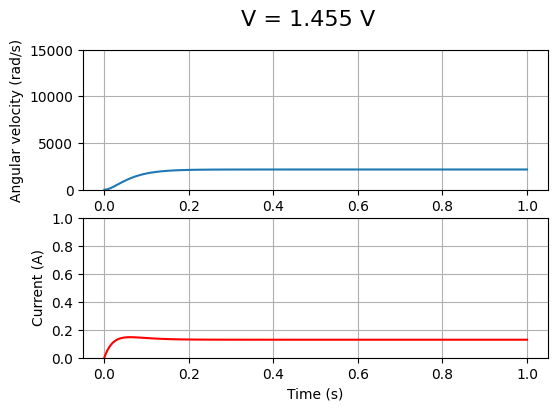

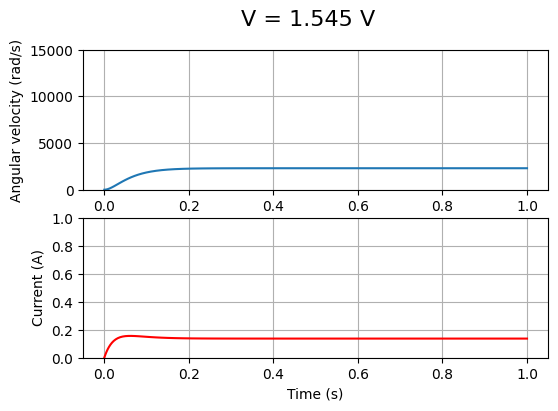

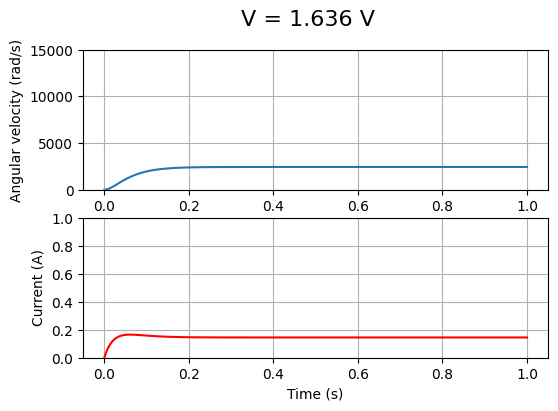

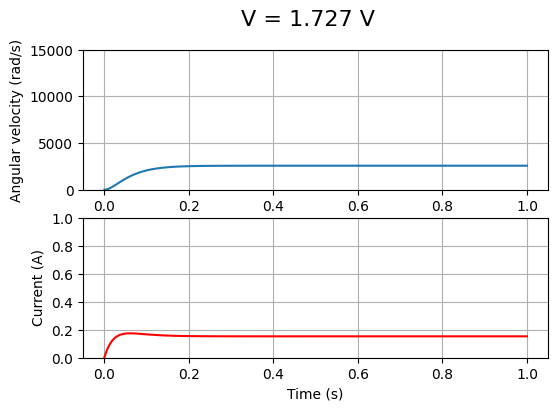

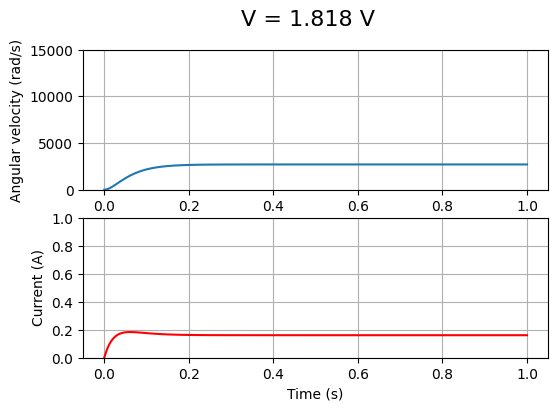

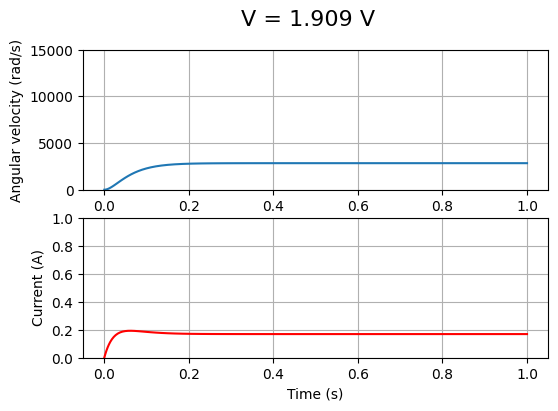

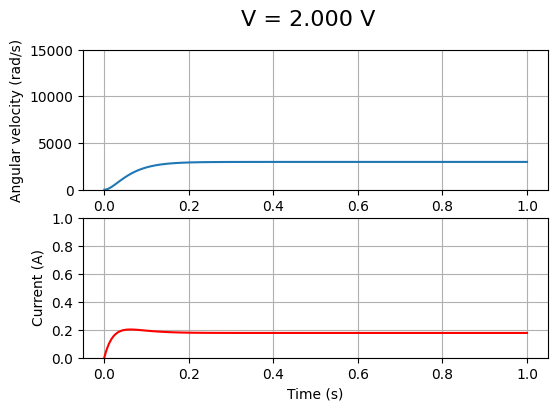

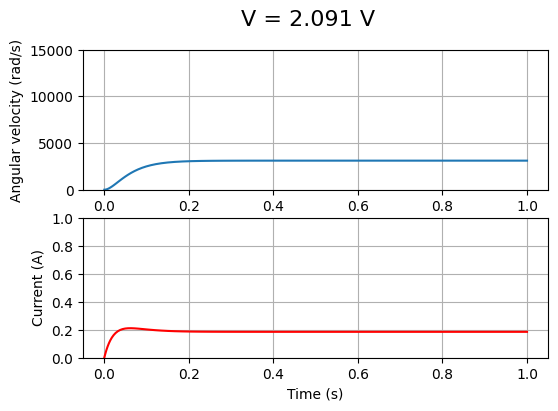

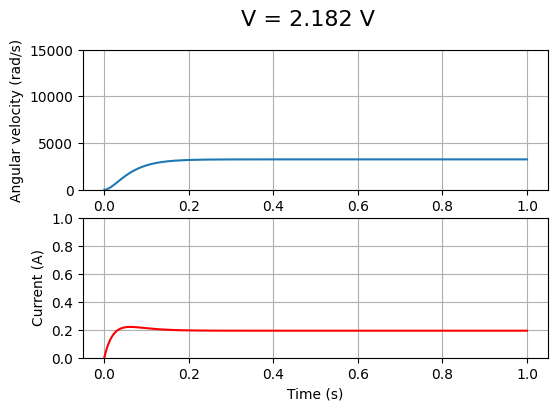

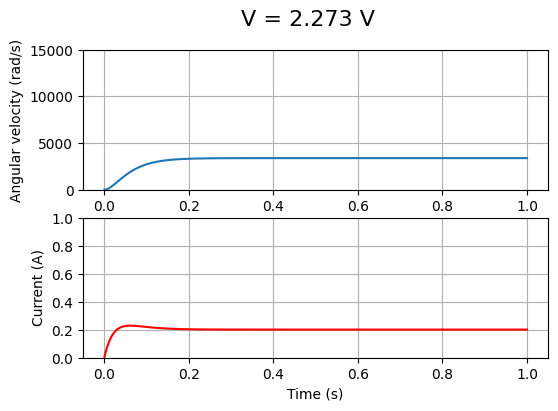

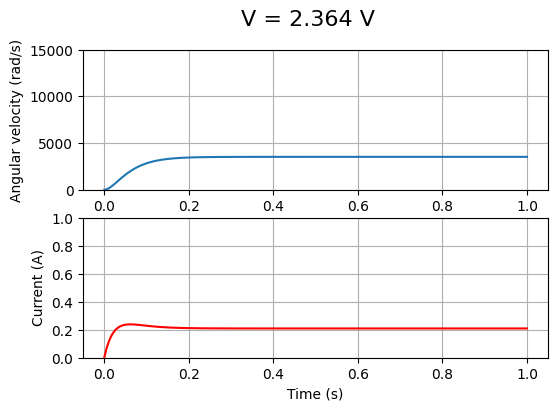

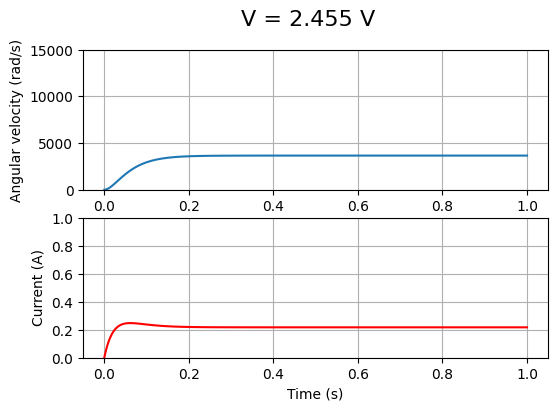

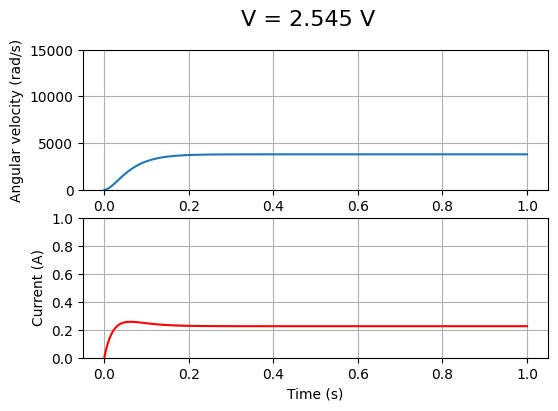

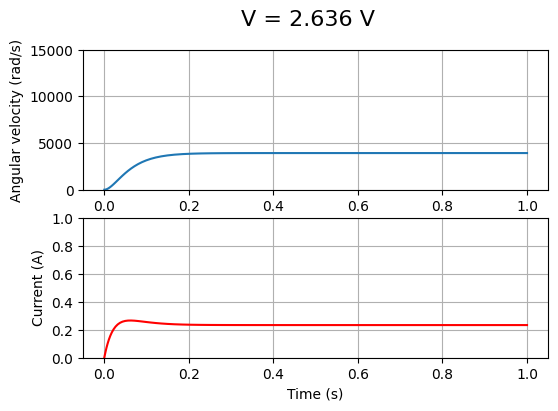

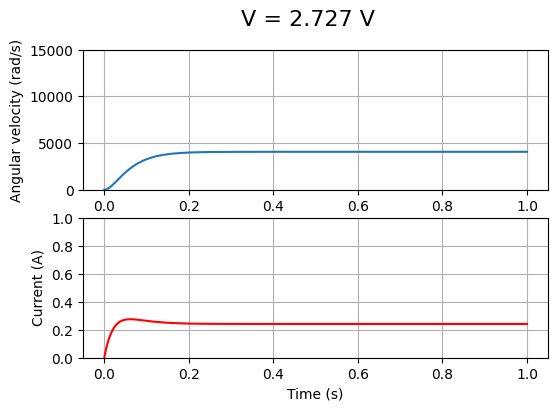

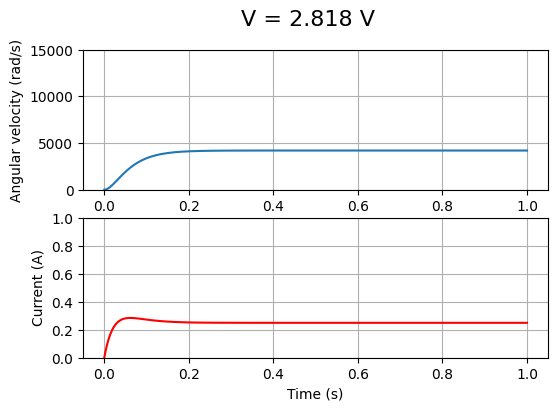

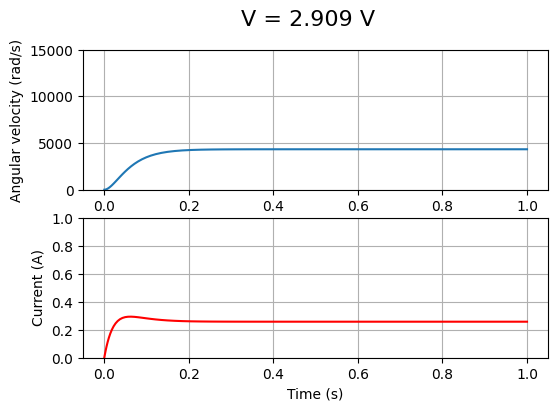

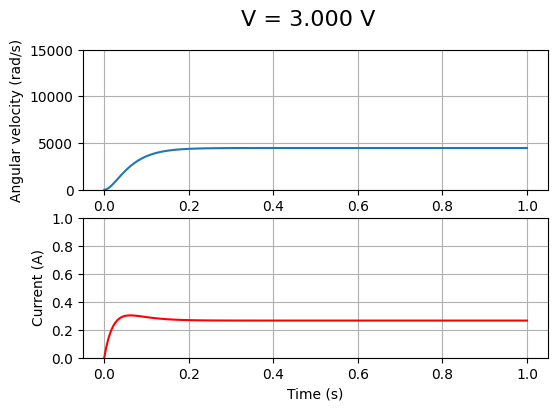

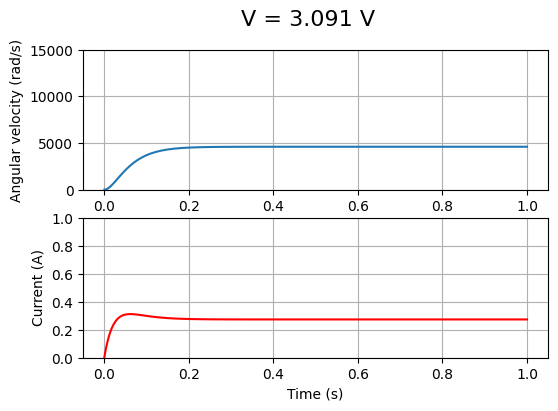

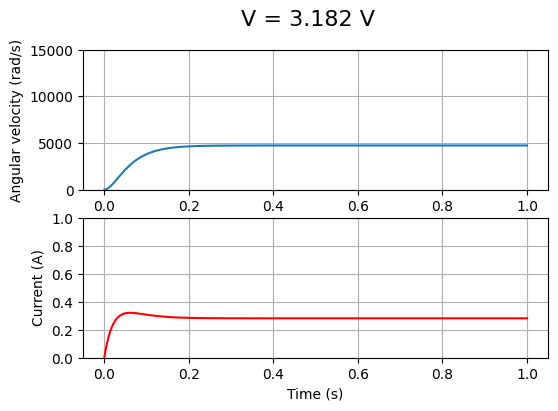

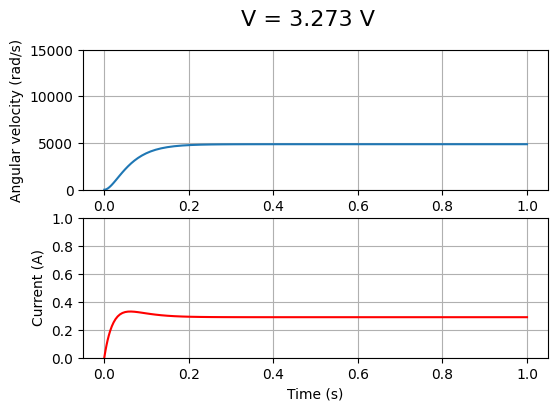

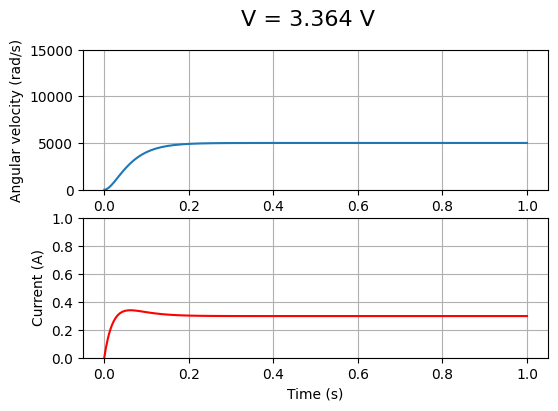

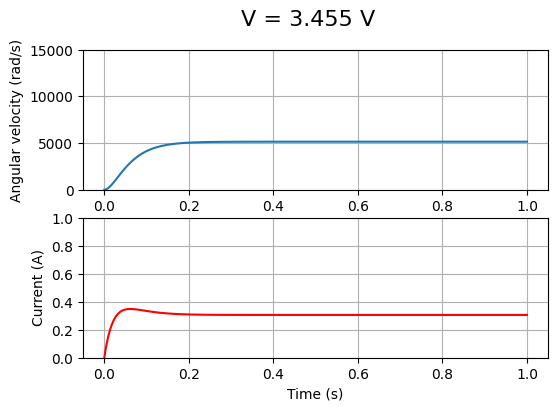

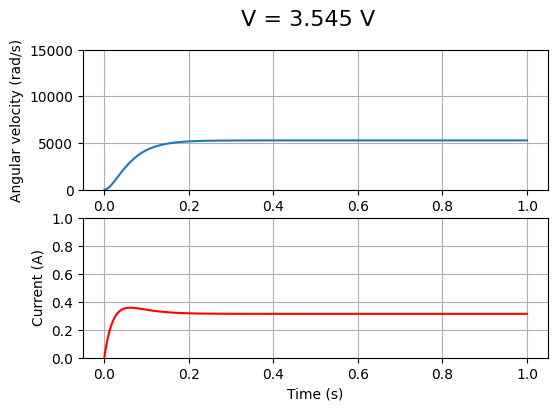

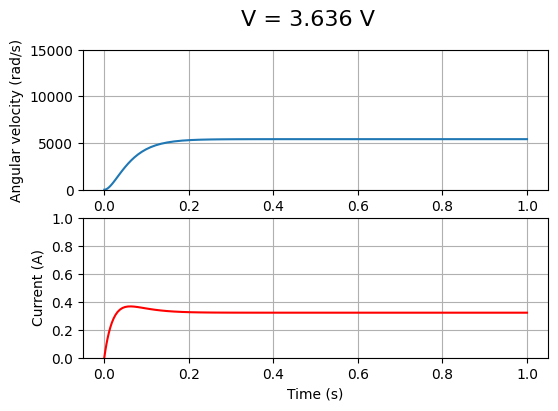

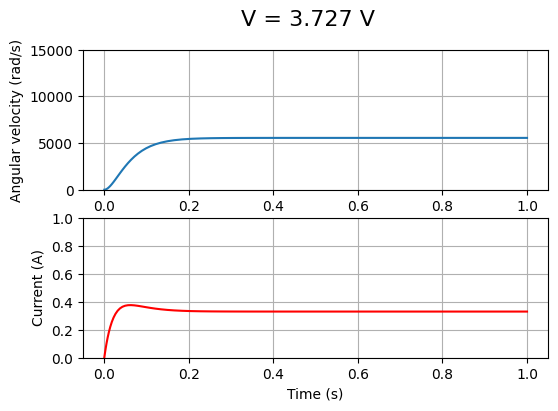

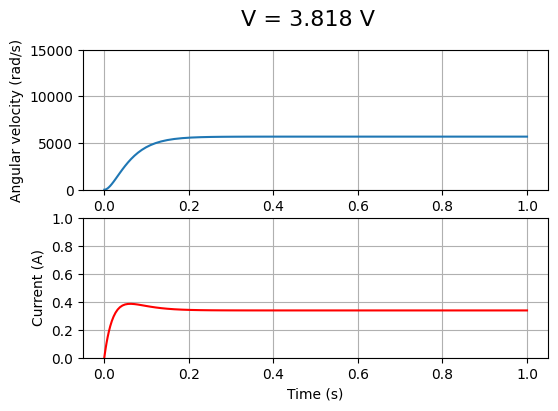

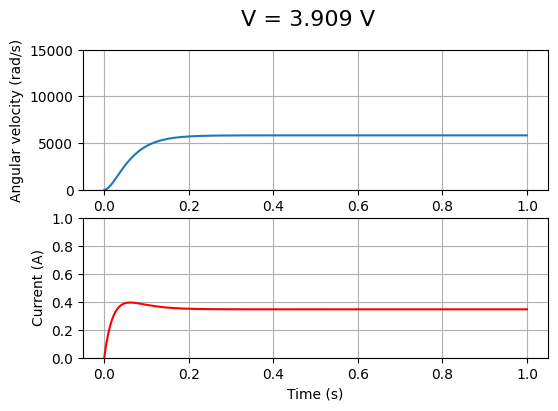

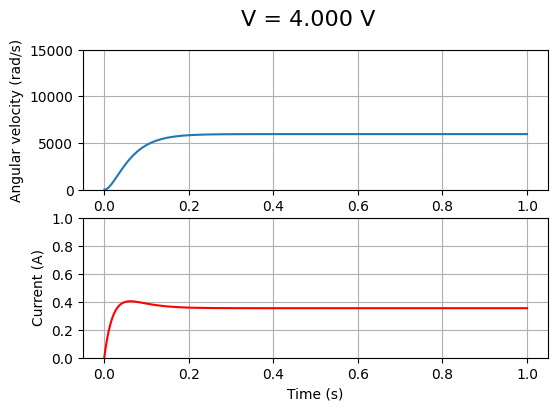

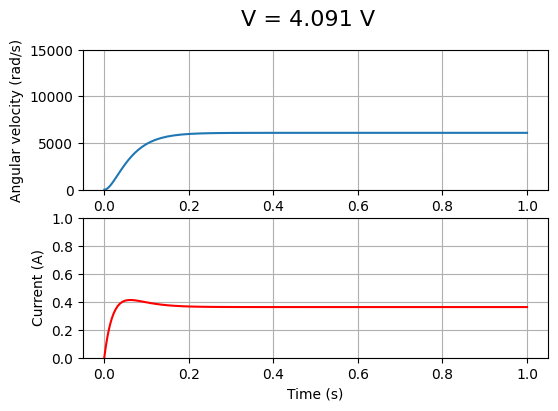

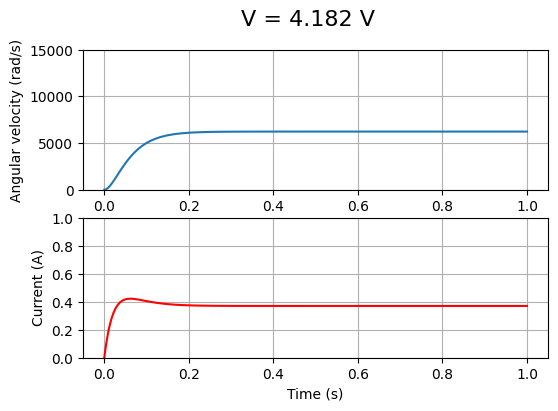

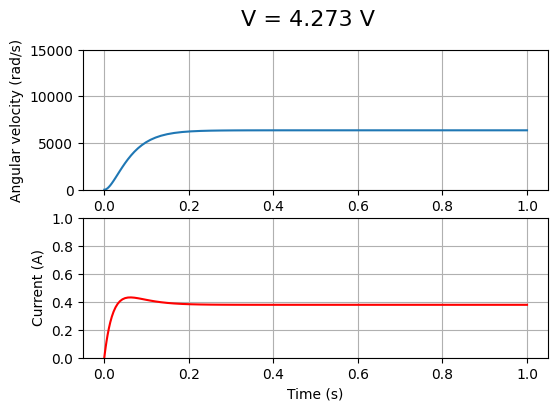

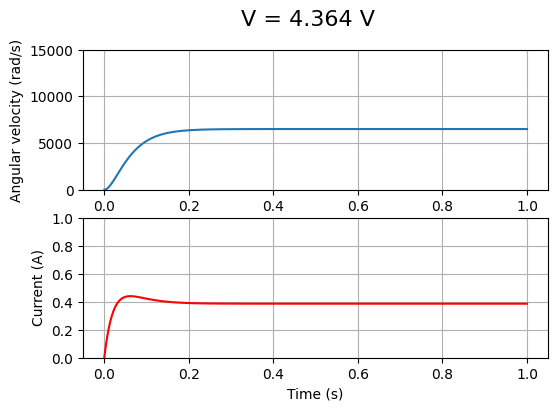

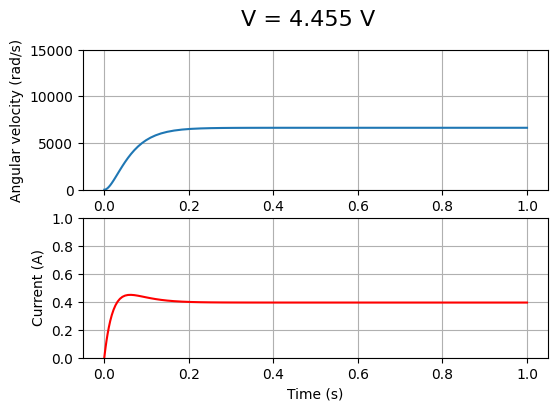

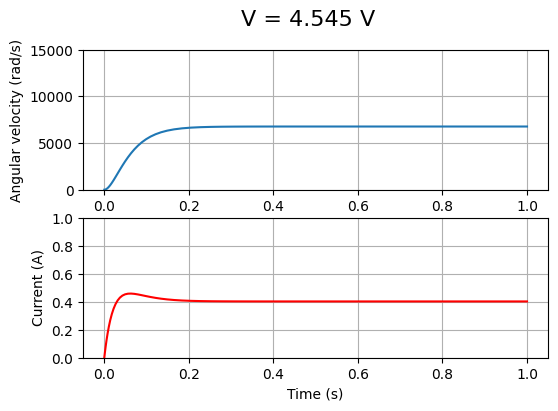

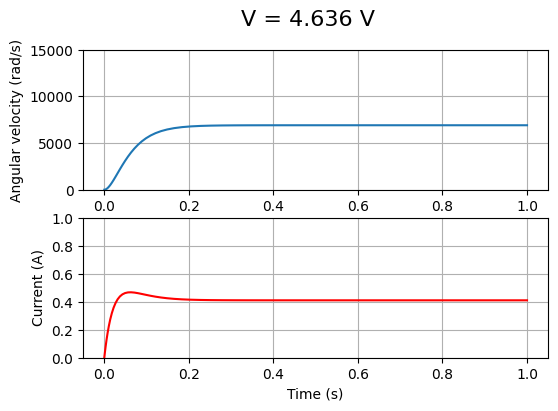

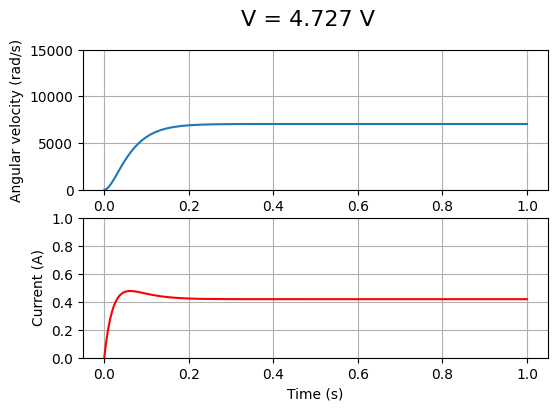

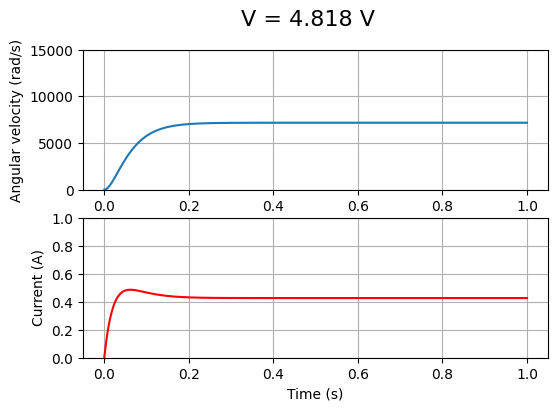

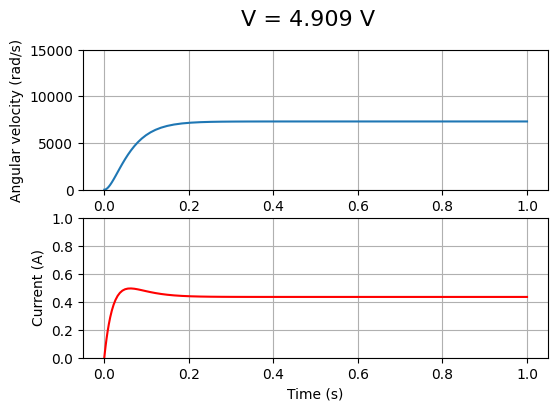

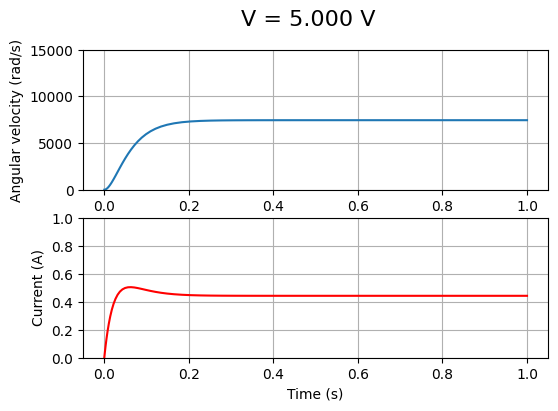

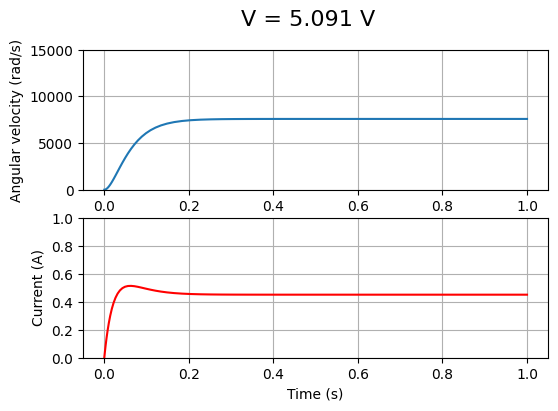

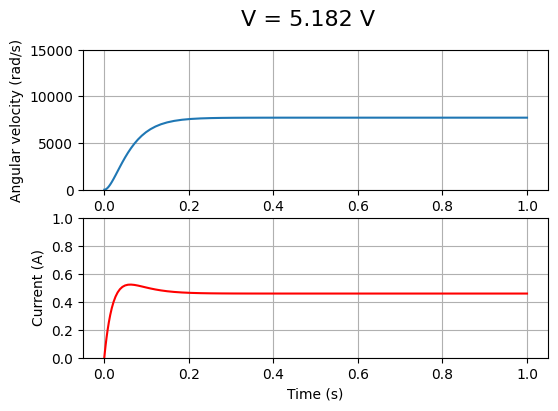

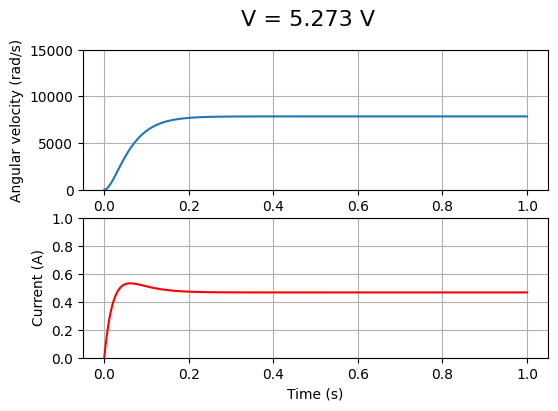

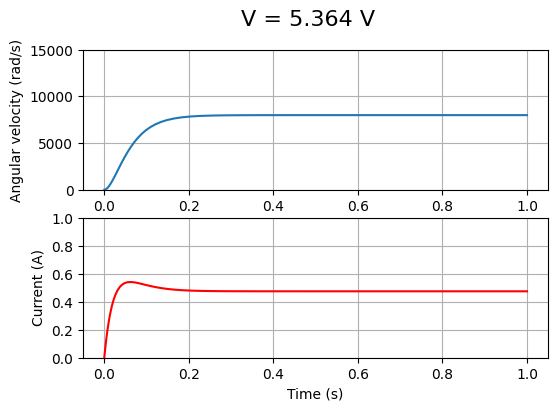

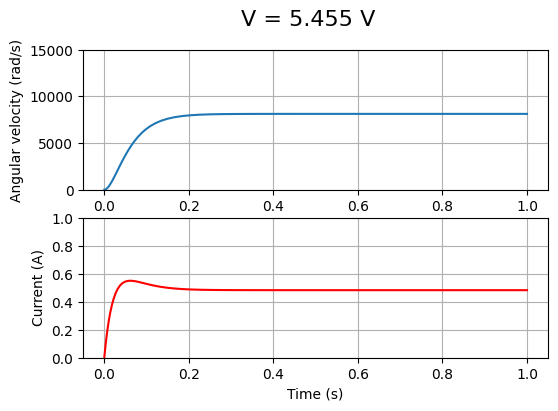

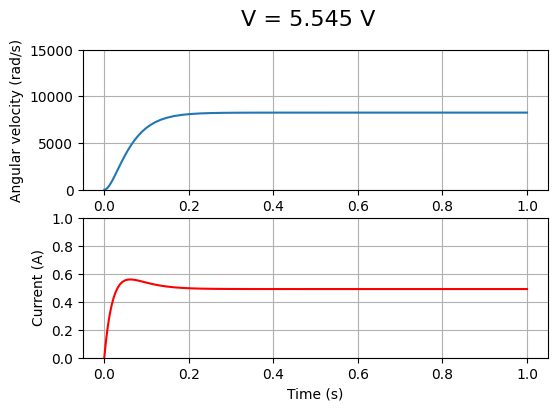

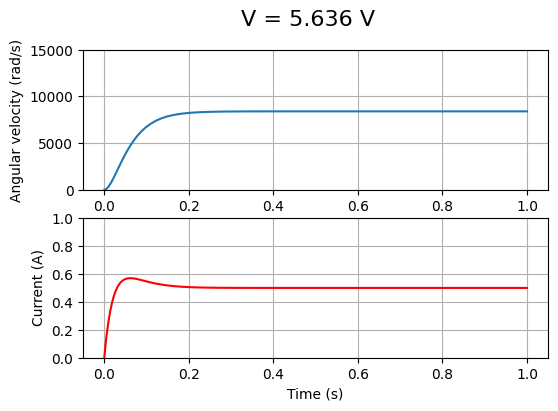

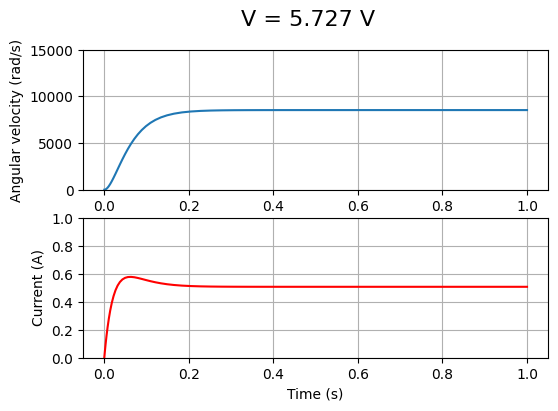

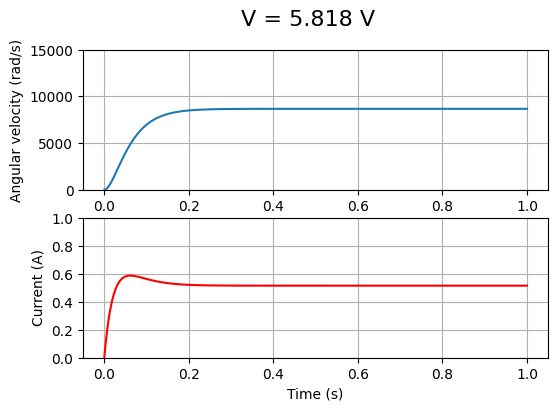

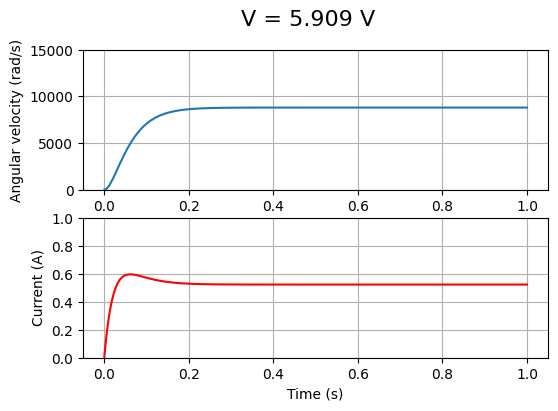

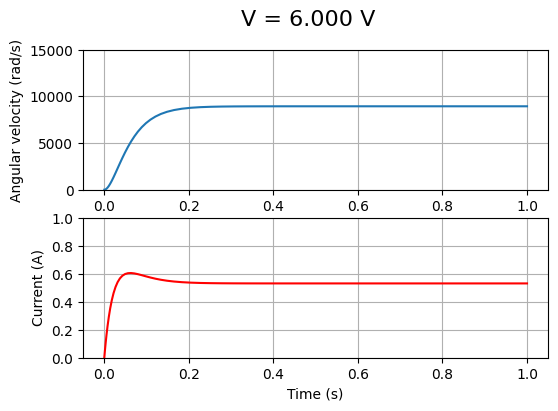

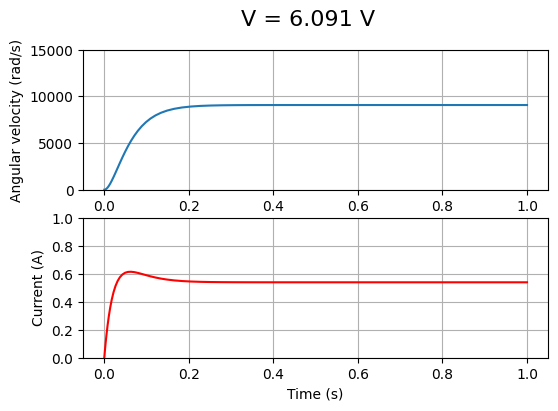

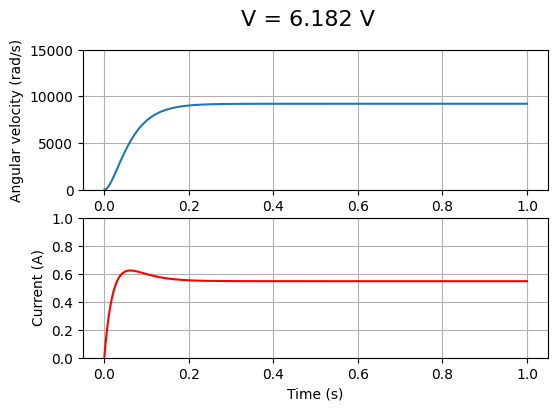

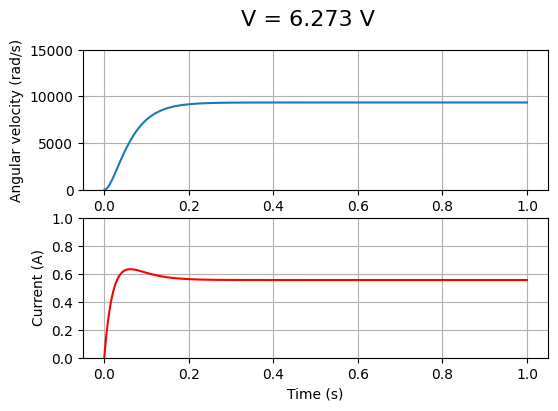

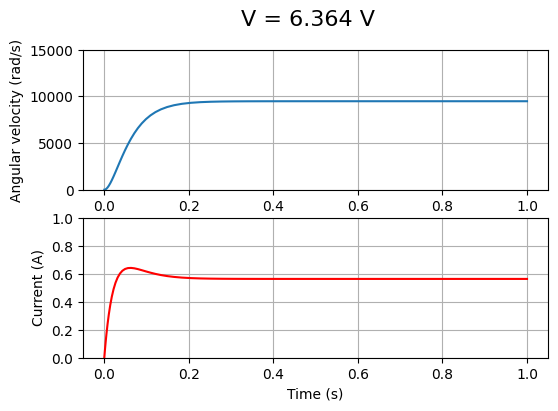

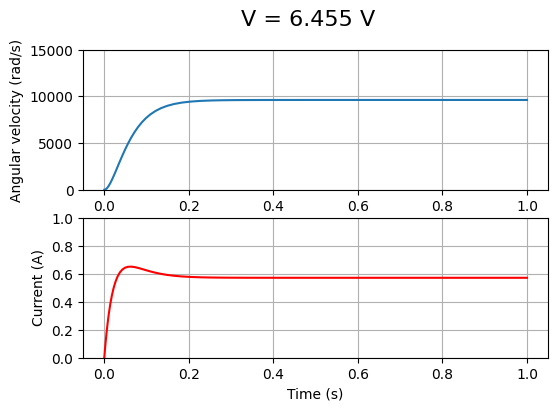

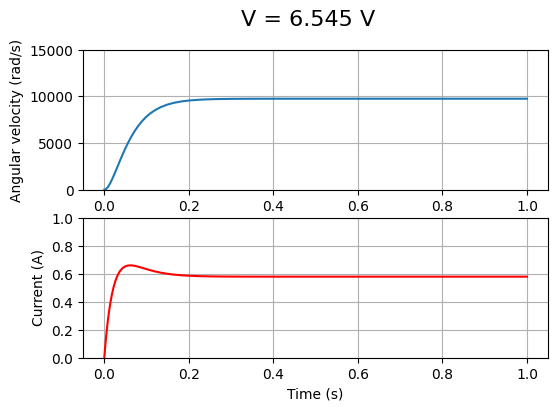

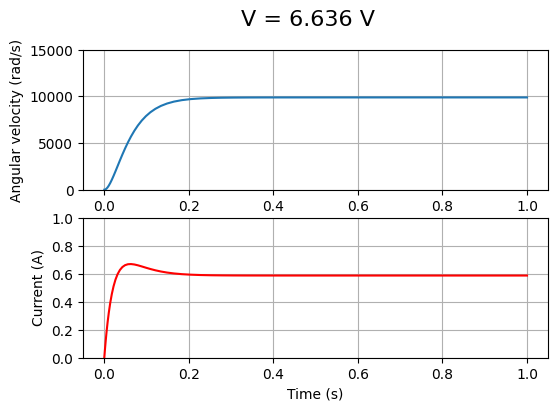

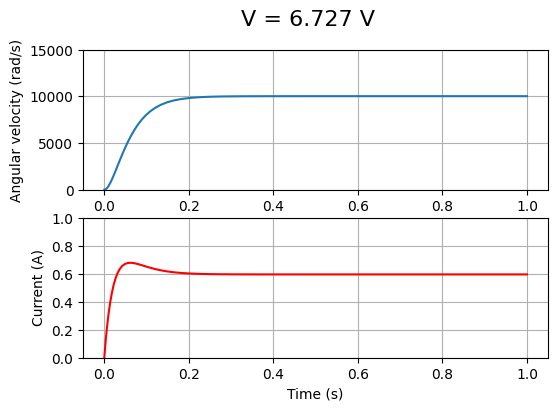

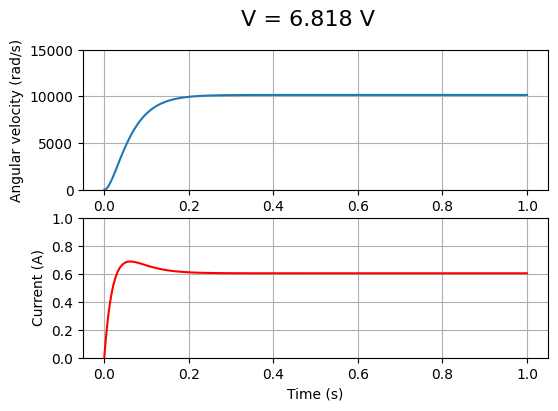

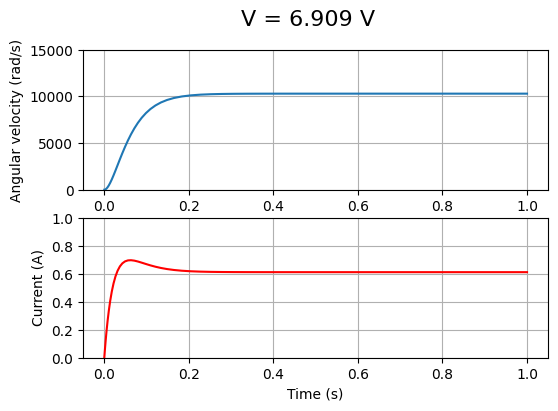

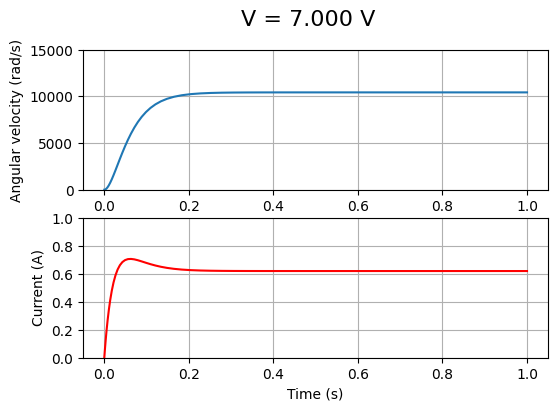

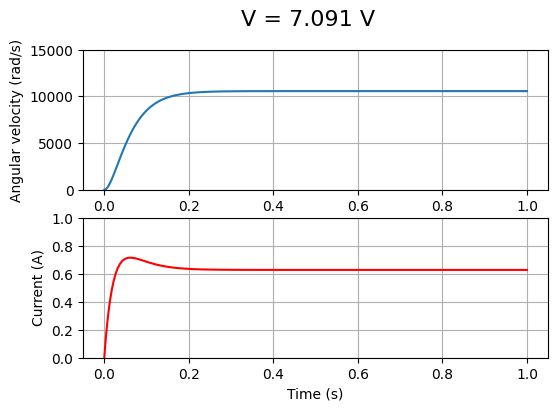

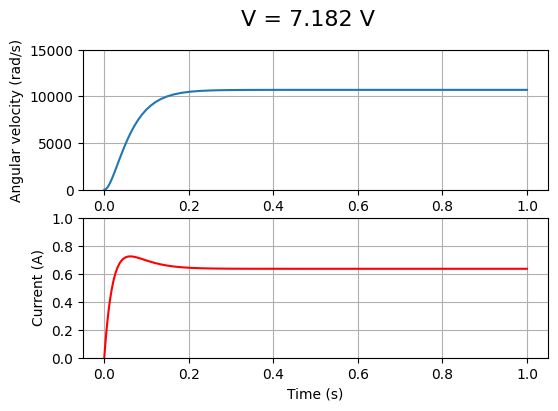

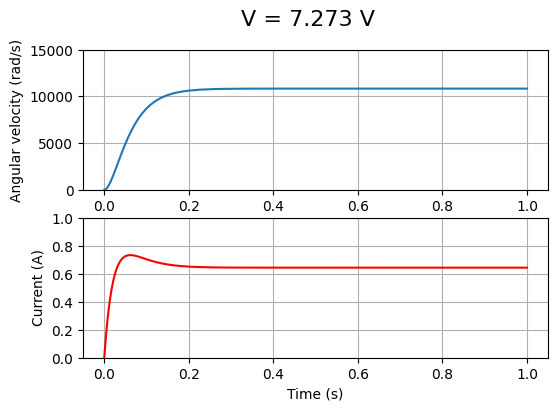

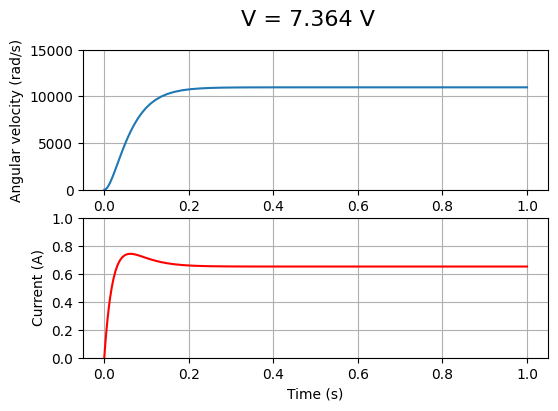

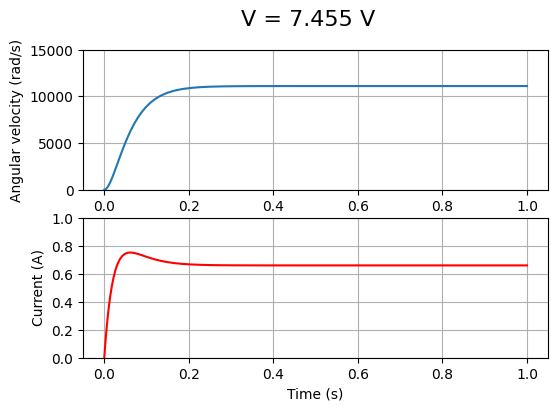

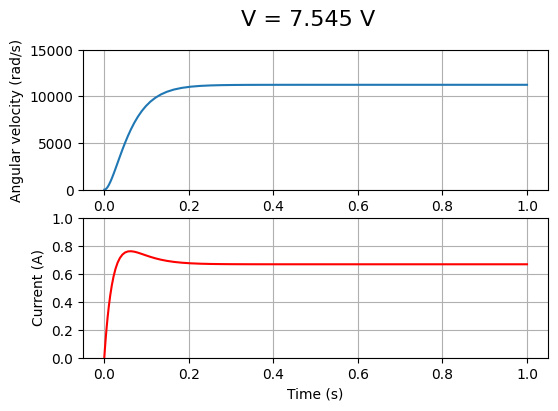

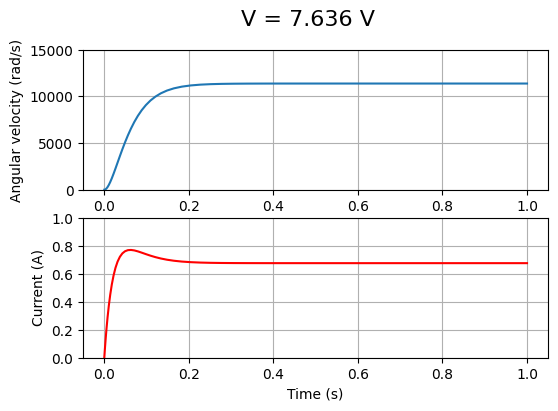

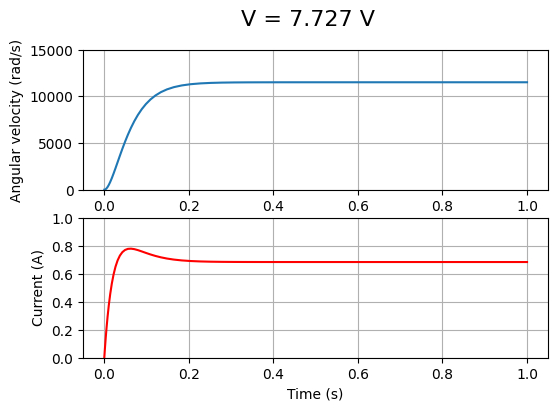

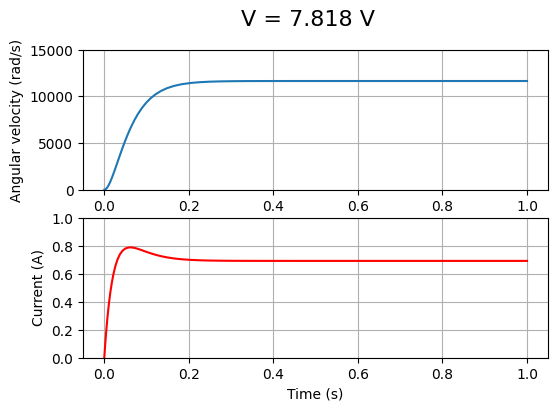

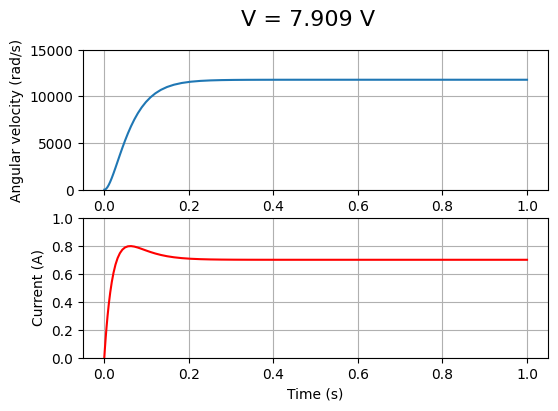

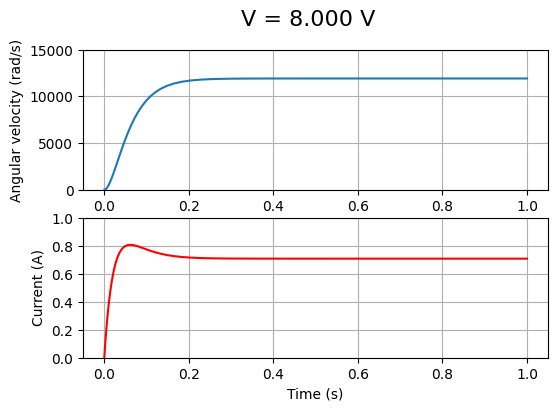

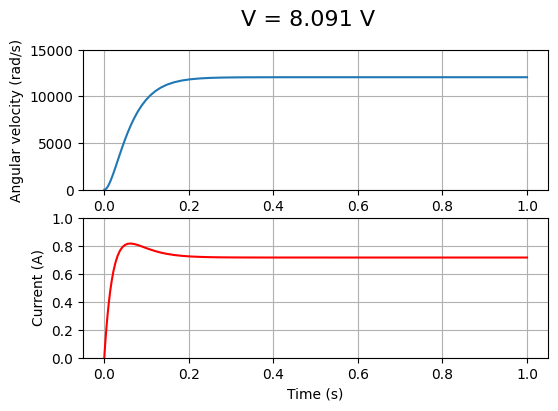

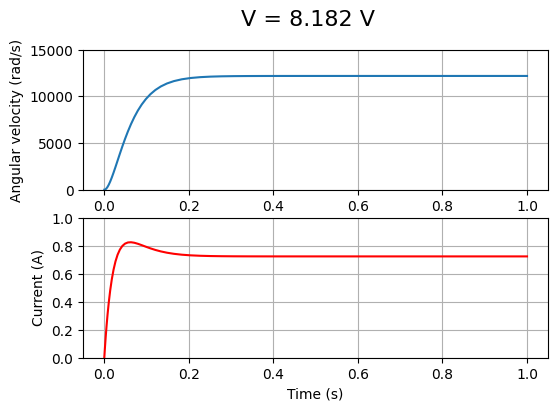

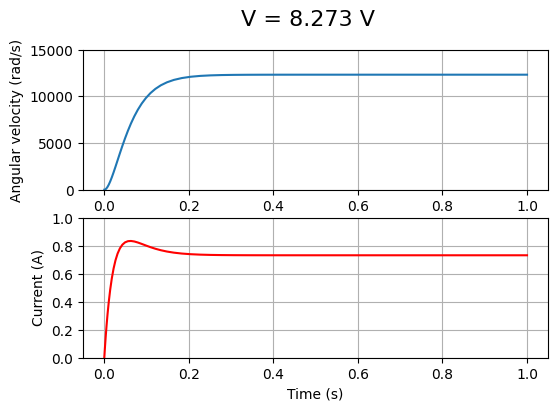

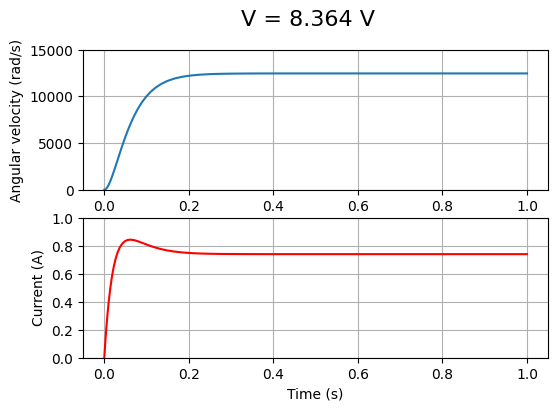

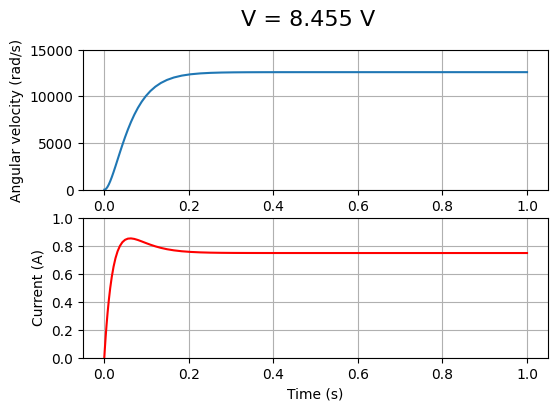

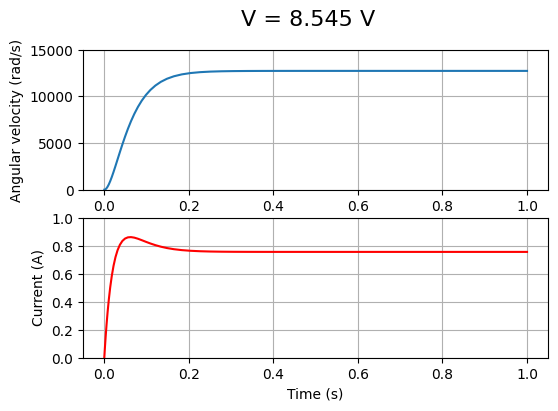

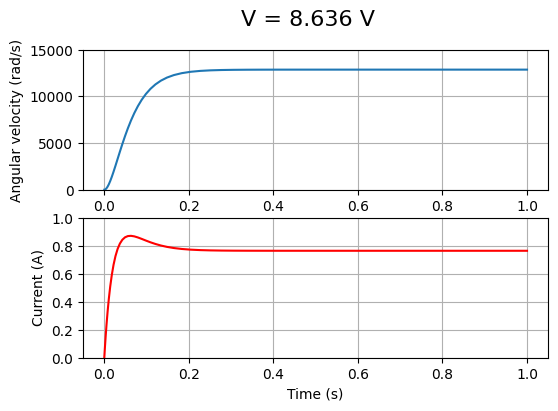

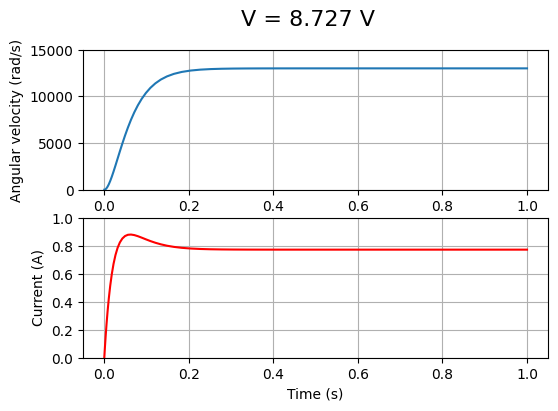

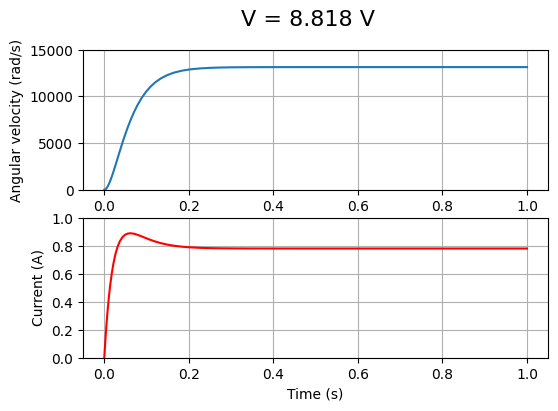

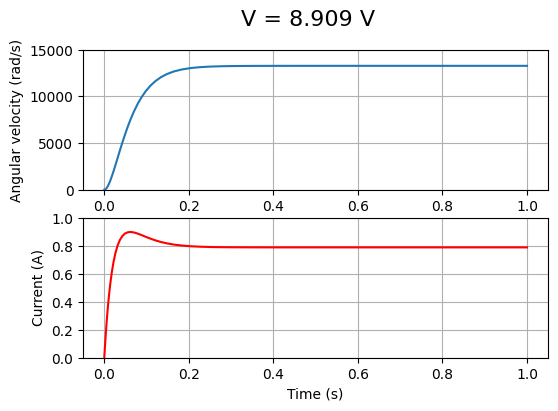

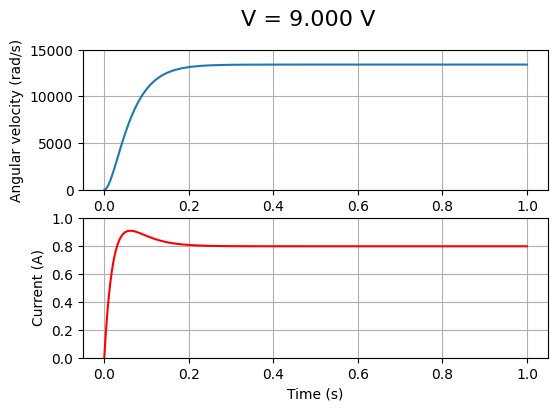

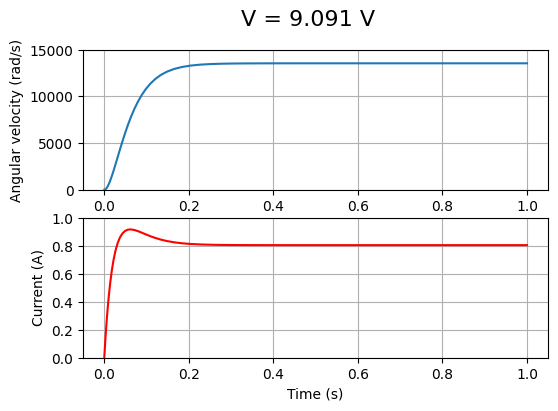

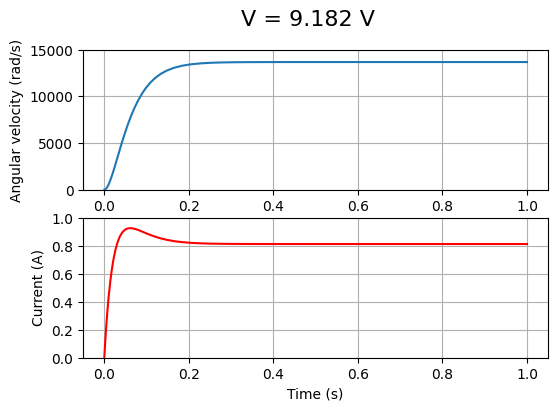

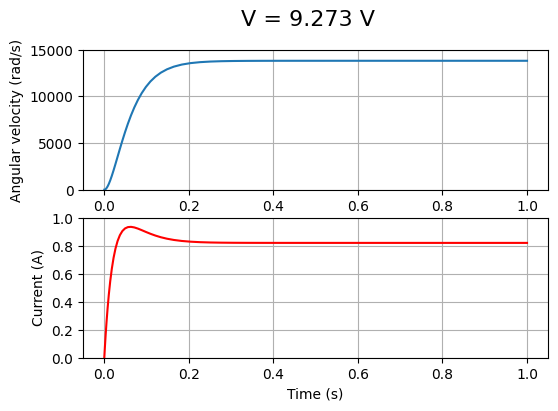

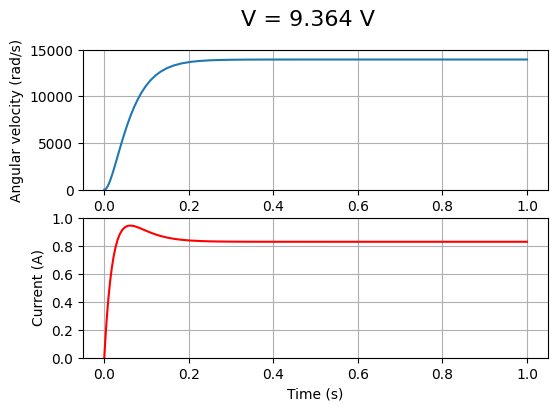

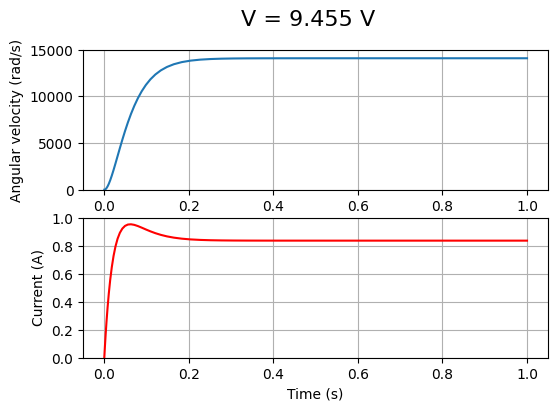

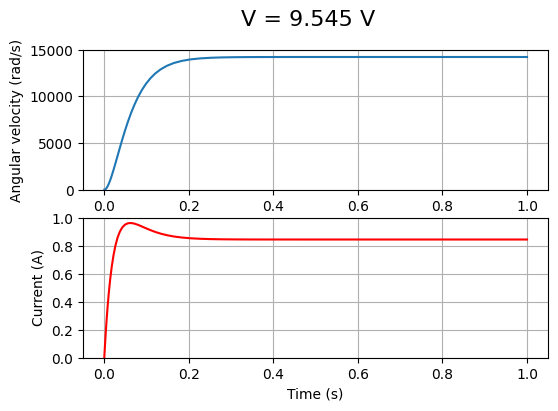

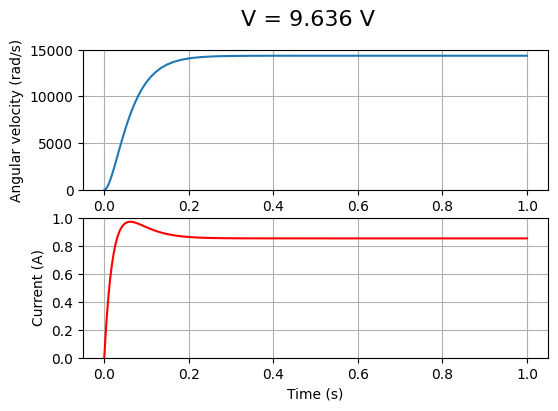

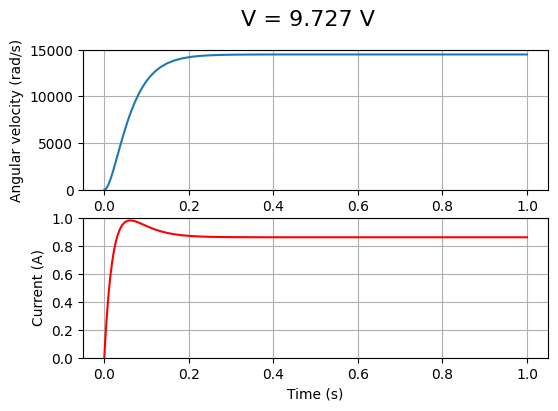

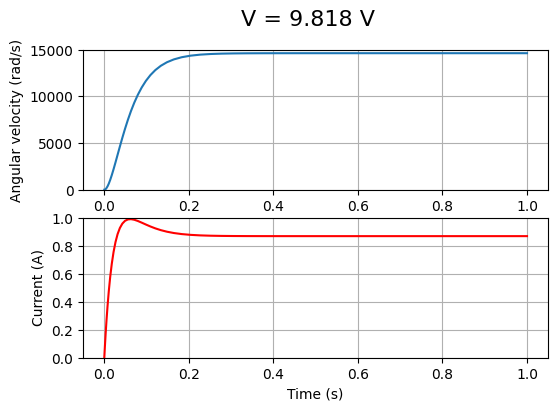

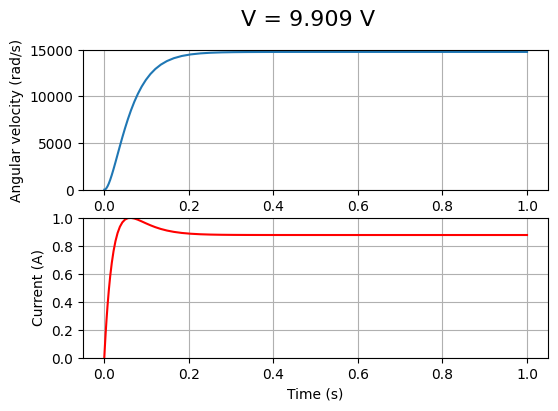

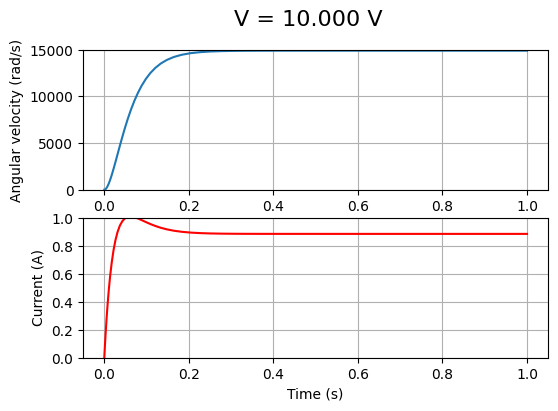

In [9]:
voltages = np.linspace(1,10, 100)
voltages_at_1s = []
angular_velocities_at_1s = []

for v in voltages:
  V = v
  sol = solve_ivp(motor_dynamics, t_span, initial_conditions, rtol=1e-6, atol=1e-8)

  # find the index in the time array closest to 1s
  idx_1s = np.abs(sol.t - 1).argmin()

  # store the voltage and corresponding angular velocity at t=1s
  voltages_at_1s.append(v)
  angular_velocities_at_1s.append(sol.y[0][idx_1s])

  # Plot the results
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
  fig.suptitle(f'V = {v:.3f} V', fontsize=16)
  ax1.plot(sol.t, sol.y[0], label='Angular velocity (rad/s)')
  ax1.set_xlabel('Time (s)')
  ax1.set_ylabel('Angular velocity (rad/s)')
  ax1.set_ylim(0, 15000)  # to ensure the y-axis goes from 0 to 15000
  ax1.grid()

  ax2.plot(sol.t, sol.y[1], label='Current (A)', color='r')
  ax2.set_xlabel('Time (s)')
  ax2.set_ylabel('Current (A)')
  ax2.set_ylim(0, 1)  # to ensure the y-axis goes from 0 to 1
  ax2.grid()

  plt.show()


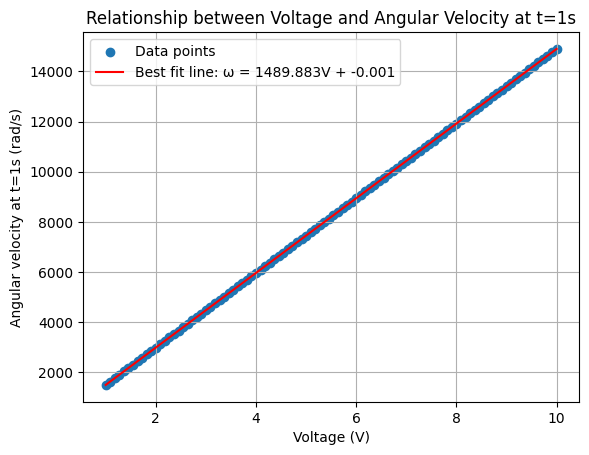

In [6]:
from scipy import stats


# Fit a degree 1 polynomial (a line) to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(voltages_at_1s, angular_velocities_at_1s)

# Generate values for the line of best fit
best_fit_line = slope * np.array(voltages_at_1s) + intercept

# Plot the data points
plt.scatter(voltages_at_1s, angular_velocities_at_1s, label='Data points')

# Plot the line of best fit
plt.plot(voltages_at_1s, best_fit_line, 'r', label=f'Best fit line: ω = {slope:.3f}V + {intercept:.3f}')

plt.xlabel('Voltage (V)')
plt.ylabel('Angular velocity at t=1s (rad/s)')
plt.title('Relationship between Voltage and Angular Velocity at t=1s')
plt.legend()
plt.grid()
plt.show()


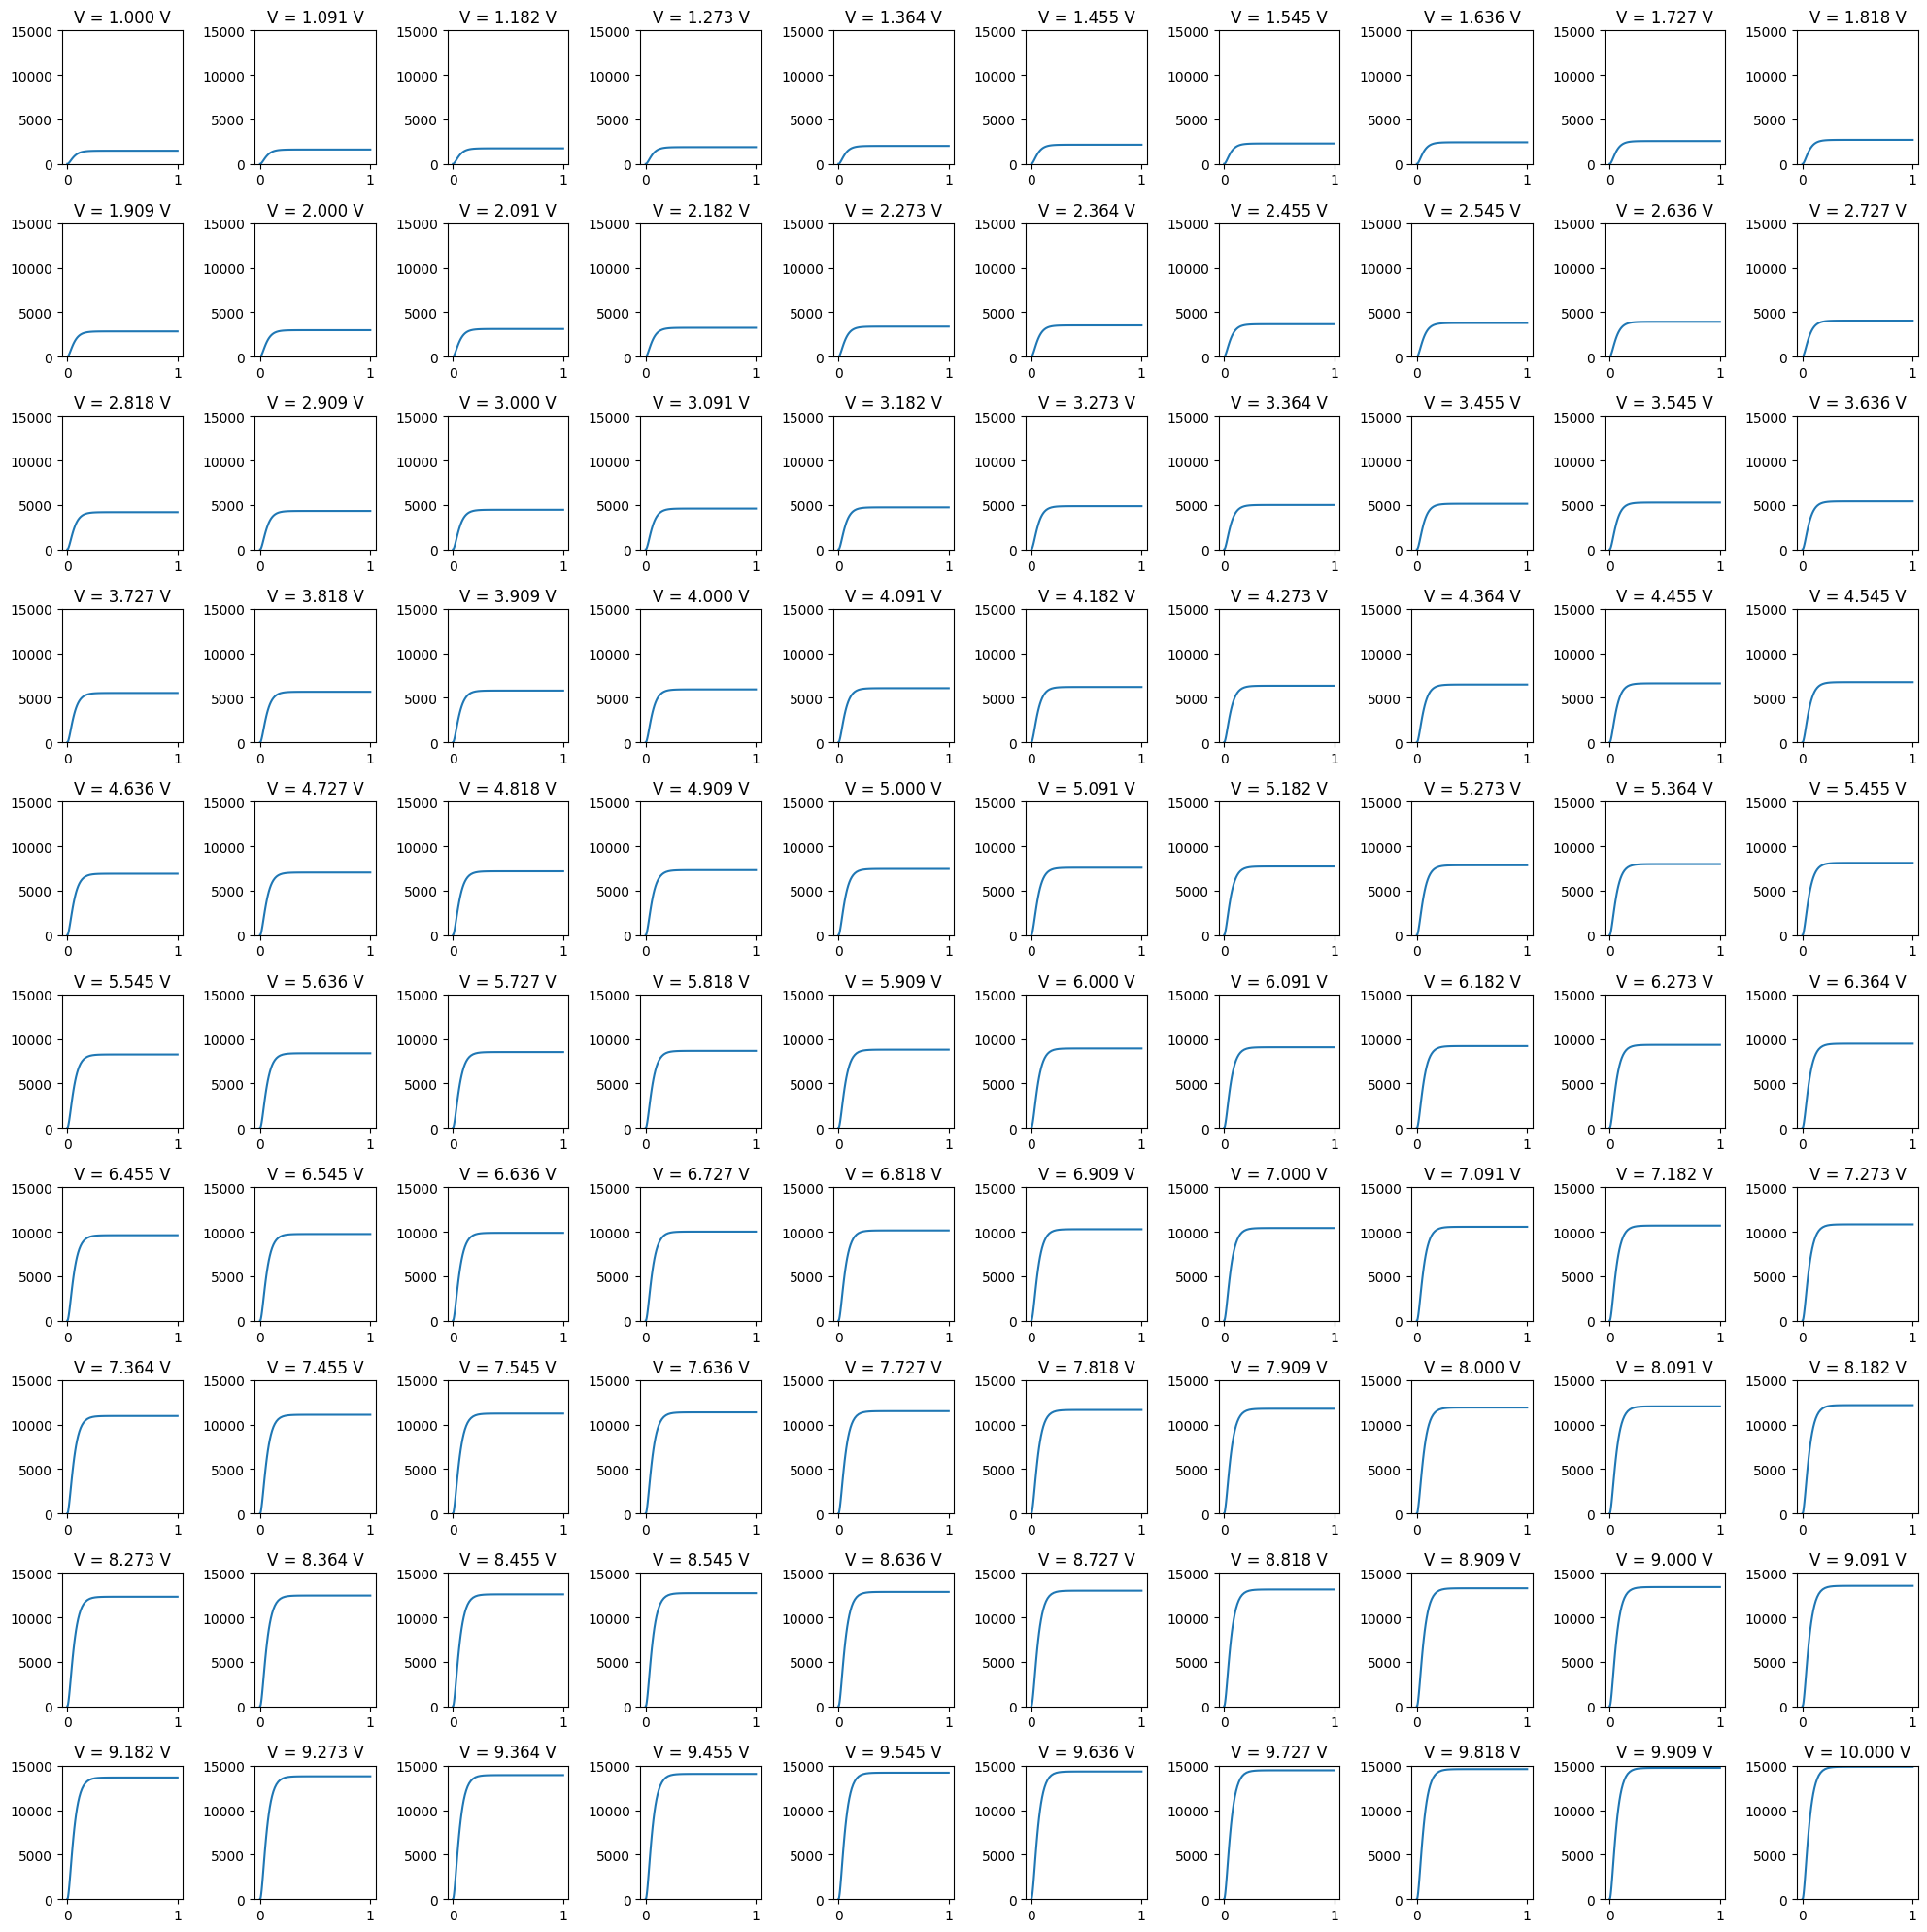

In [5]:
voltages = np.linspace(1,10, 100)
voltages_at_1s = []
angular_velocities_at_1s = []

fig, axs = plt.subplots(10, 10, figsize=(20, 20))  # 10x10 grid of subplots
axs = axs.flatten()  # flatten the 2D array of axes into a 1D array for easy indexing

for idx, v in enumerate(voltages):
  V = v
  sol = solve_ivp(motor_dynamics, t_span, initial_conditions, rtol=1e-6, atol=1e-8)

  # find the index in the time array closest to 1s
  idx_1s = np.abs(sol.t - 1).argmin()

  # store the voltage and corresponding angular velocity at t=1s
  voltages_at_1s.append(v)
  angular_velocities_at_1s.append(sol.y[0][idx_1s])

  # plot angular velocity
  axs[idx].plot(sol.t, sol.y[0], label='Angular velocity (rad/s)')
  axs[idx].set_ylim([0, 15000])  # set y-axis limits
  axs[idx].set_title(f'V = {v:.3f} V')  # only display up to 3 decimal places


for idx in range(len(voltages), len(axs)):
  fig.delaxes(axs[idx])

# show all subplots at once
plt.tight_layout()  # adjust spacing between subplots to minimize overlaps
plt.show()
